# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
#env = UnityEnvironment(file_name='...')
env = UnityEnvironment(file_name="Reacher.app")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
LOADED MODELS FROM DISK
[ 2.59857178e-02 -3.99916959e+00  8.52050781e-02  9.99938667e-01
  3.23186582e-03 -2.88213487e-05  1.05979210e-02 -4.22495723e-01
  1.64000667e-03  1.28636658e-01  5.17168880e-01  2.36659963e-02
  1.69829357e+00 -3.48281860e-03 -9.99740601e+00  6.74705505e-02
  9.99874949e-01 -8.14162195e-03 

[-1.71330643 -3.49127841  0.9467659   0.9674173  -0.21647669  0.02867485
  0.12813804 -0.31358218  0.0136516   0.0518129   0.19475029  0.20140702
  1.12560141 -0.21923447 -7.24180365  1.42900848  0.53836519  0.32803971
  0.63143992 -0.45148256  6.58734226 -2.96323466  0.88567001  2.93166494
  6.17582941  2.18059659  5.13653564 -1.          6.13318634  0.
  1.          0.         -0.16816485]
[-0.56847    -3.33936191  2.13393021  0.95781803 -0.06806077  0.01980144
  0.27849653 -0.45940351  0.13207549  0.21219309  0.99398875  0.84058052
  1.62880826  0.31077576 -7.5835638   1.65670776  0.87341827  0.16896366
  0.16331424 -0.42652133  0.18407176  0.33062503  0.05849274  0.87870741
  2.14364219  1.72138548 -4.33499146 -1.         -6.72367859  0.
  1.          0.         -0.53301406]
[-2.12252045e+00 -3.39198995e+00 -1.40419006e-01  9.61380541e-01
 -2.74458289e-01 -5.57354745e-03 -1.97238475e-02  7.79191673e-01
  1.75751280e-02 -6.98034525e-01 -2.40473890e+00  1.51606178e+00
 -2.64615464e+0

Total score (averaged over agents) this episode: 18.775999580323695
Game Number: 2
Total score (averaged over agents) this episode: 27.894999376498163
Game Number: 3
Total score (averaged over agents) this episode: 27.59799938313663
Game Number: 4
Total score (averaged over agents) this episode: 30.08649932751432
Game Number: 5
Total score (averaged over agents) this episode: 31.712999291159214
Scored over 30, great job little agent!
Game Number: 6
Total score (averaged over agents) this episode: 32.03499928396195
Scored over 30, great job little agent!
Game Number: 7
Total score (averaged over agents) this episode: 31.787499289494008
Scored over 30, great job little agent!
Game Number: 8
Total score (averaged over agents) this episode: 26.640999404527246
Game Number: 9
Total score (averaged over agents) this episode: 22.13799950517714
Game Number: 10
Total score (averaged over agents) this episode: 32.550999272428456
Scored over 30, great job little agent!
Game Number: 11
Total score 

Total score (averaged over agents) this episode: 29.975999329984187
Game Number: 61
Total score (averaged over agents) this episode: 29.56099933926016
Game Number: 62
Total score (averaged over agents) this episode: 30.164499325770883
Game Number: 63
Total score (averaged over agents) this episode: 31.0309993064031
Scored over 30, great job little agent!
Game Number: 64
Total score (averaged over agents) this episode: 32.29049927825108
Scored over 30, great job little agent!
Game Number: 65
Total score (averaged over agents) this episode: 30.716999313421546
Game Number: 66
Total score (averaged over agents) this episode: 29.944999330677092
Game Number: 67
Total score (averaged over agents) this episode: 30.432499319780618
Game Number: 68
Total score (averaged over agents) this episode: 29.091999349743126
Game Number: 69
Total score (averaged over agents) this episode: 30.099999327212572
Game Number: 70
Total score (averaged over agents) this episode: 31.642999292723836
Scored over 30, 

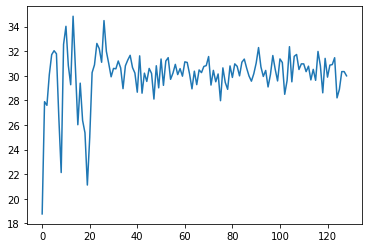

In [1]:
#**This is the solved environment for only one reacher agent. 
#**There is a bug on the unity engine in MAC. You cannot start two unity environments in the same app
#**even if you close on with env.close(). Therefore you must run this cell individually. 

#**REFERECE: https://towardsdatascience.com/deep-deterministic-policy-gradients-explained-2d94655a9b7b

#**For this project I used some of the skeleton code from the blog above. However, I had to change a lot of
#**stuff including the Torch model which was not optimal for this task. 

from unityagents import UnityEnvironment
import numpy as np

import matplotlib.pyplot as plt
from ddpg import DDPGagent
from utils import *

env = UnityEnvironment(file_name="Reacher_20_agents.app")


# Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

# In[3]:


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


# ### 2. Examine the State and Action Spaces
# 
# In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.
# 
# The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.
# 
# Run the code cell below to print some information about the environment.

# In[4]:


# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])


# ### 3. Take Random Actions in the Environment
# 
# In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.
# 
# Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  
# 
# Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

# In[5]:


load_modelz = True
modelz_list = []
modelz_list.append("MODEL_CHECKPOINT.5097780.actor.pt") #**<model has exploding gradients
modelz_list.append("MODEL_CHECKPOINT.5097780.actor_target.pt")
modelz_list.append("MODEL_CHECKPOINT.5097780.critic.pt")
modelz_list.append("MODEL_CHECKPOINT.5097780.critic_target.pt")

modelz_list = []
modelz_list.append("MODEL_CHECKPOINT.8028957.actor.pt") #**Model loaded for this run. 
modelz_list.append("MODEL_CHECKPOINT.8028957.actor_target.pt")
modelz_list.append("MODEL_CHECKPOINT.8028957.critic.pt")
modelz_list.append("MODEL_CHECKPOINT.8028957.critic_target.pt")

agent = DDPGagent(load_modelz, modelz_list, env_info)
noise = OUNoise(env_info.previous_vector_actions)
batch_size = 20
rewards = []
avg_rewards = []

#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
#states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
all_scores = []
last_20 = []
max_games = 0
noise_set = True    #**do we want temporary exploration?
total20 = 0
train_model = True      #**Do we wish to train model? or just play the game?
LR_update_max = 2       #**MAX times to update learning rate
thirty_in_row = 0
stop_training = False
throttle_model_update = 0
throttle_model_max = 10 #**well just update the model every 10 steps.
alternate_noise = True
twenty_agents = True
decay_learning_rate = False 

test_throttle = 0

while True:
    actions = np.random.randn(num_agents, action_size)  # select an action (for each agent)
    actions = np.clip(actions, -1, 1)  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]  # send all actions to tne environment
    next_states = env_info.vector_observations  # get next state (for each agent)
    for idx in next_states:
        print(idx)
    rewards = env_info.rewards  # get reward (for each agent)
    dones = env_info.local_done  # see if episode finished
    scores += env_info.rewards  # update the score (for each agent)
    states = next_states  # roll over states to next time step
    test_throttle += 1
    if test_throttle == 10:
        break
    if np.any(dones):  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

#------------

game_limit = 300

while max_games != game_limit and stop_training == False:
    env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)
    max_games += 1
    if max_games % 100 == 0: #**We have plenty of hard drive so well save every 20 games!
        agent.save_models()      #**Were going to go to moving average over 100 for project requirements! 
        if len(last_20) > 5:
            total20 = 0
            for idx in last_20:
                total20 += idx
            avg = total20 / len(last_20)
            print("Moving Avg Over 100 Episodes: " + str(avg))
            last_20 = [] #**Reset previous 20 scores!
    print("Game Number: " + str(max_games))
    t_step = 0

    #-----------------------START TRAINING BRO
    while True:
        actions_list = []
        noisey_actions = []
        for individual_state in states:
            individual_state = individual_state.reshape(33)
            actions = agent.get_action(individual_state, train_model) #*well flip to sigmod in model to get between -1 and 1
            actions = actions.reshape(4)
            actions_list.append(actions)
        actions_list = np.asarray(actions_list)

        if noise_set:
            for individual_action in actions_list:
                actions = noise.get_action(individual_action, t_step)
                noisey_actions.append(actions)
            noisey_actions = np.asarray(noisey_actions)

        if max_games == game_limit and noise_set and alternate_noise:  #**Use exploration just to get a baseline
            noise_set = False
            print("Turning off Exploration")

        if noise_set:
            env_info = env.step(noisey_actions)[brain_name]           # send all actions to tne environment
        else:
            env_info = env.step(actions_list)[brain_name]  # send all actions to tne environment

        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)

        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)

        if train_model:     #**We might not want to train!
            for idx in range(0, 5):
                #print(idx)
                states1 = states[idx]
                if noise_set:
                    actions1 = noisey_actions[idx]
                else:
                    actions1 = actions_list[idx]
                da_reward1 = rewards[idx]
                next_states1 = next_states[idx]
                dones1 = dones[idx]
                agent.memory.push(states1, actions1, da_reward1, next_states1, dones1)

        if train_model:
            #throttle_model_update = throttle_model_update + 1 #**lets update the model less often
            #if throttle_model_update >= throttle_model_max:
            shat = len(agent.memory)
            if len(agent.memory) > batch_size:
                agent.update(batch_size, train_model)
             #   throttle_model_update = 0

        states = next_states                               # roll over states to next time step
        t_step += 1     #**Time Step!
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
    float_score = np.mean(scores)
    float_score = float_score.item()
    all_scores.append(float_score)
    last_20.append(float_score) #***Calculate moving average!

    if decay_learning_rate:
        if float_score >= 30 and LR_update_max:  # **Once we know a lot, lets reduce our learning rate!
            LR_update_max = LR_update_max - 1  # **well only update the learning rate a few times.
            lr1, lr2 = agent.get_learning_rate()
            lr1 = lr1 * .10
            lr2 = lr2 * .10
            agent.update_learning_rate(lr1, lr2)

    if float_score >= 31:  # **Once we know enough, no reason to keep training! :)
        print("Scored over 30, great job little agent!")
        thirty_in_row += 1
    else:
        thirty_in_row = 0
    if thirty_in_row == 5:
        print("Appears we understand environment Stop Training little agent!")
        #stop_training = True
        train_model = False
        game_limit = 101 #**Lets turn off training and run for 100 more games
        max_games = 0
        print("Run for 100 more games without training")
    # When finished, you can close the environment.

    # In[ ]:


# When finished, you can close the environment.

# In[ ]:


env.close()
print("Writing Final Model Check Point")
agent.save_models()
from matplotlib import pyplot as plt
plt.plot(all_scores)
plt.show()
